In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from scipy.stats import pearsonr

In [4]:
data=pd.read_excel("dataset\Linear_Regression.xlsx",sheet_name=0)

In [5]:
data.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


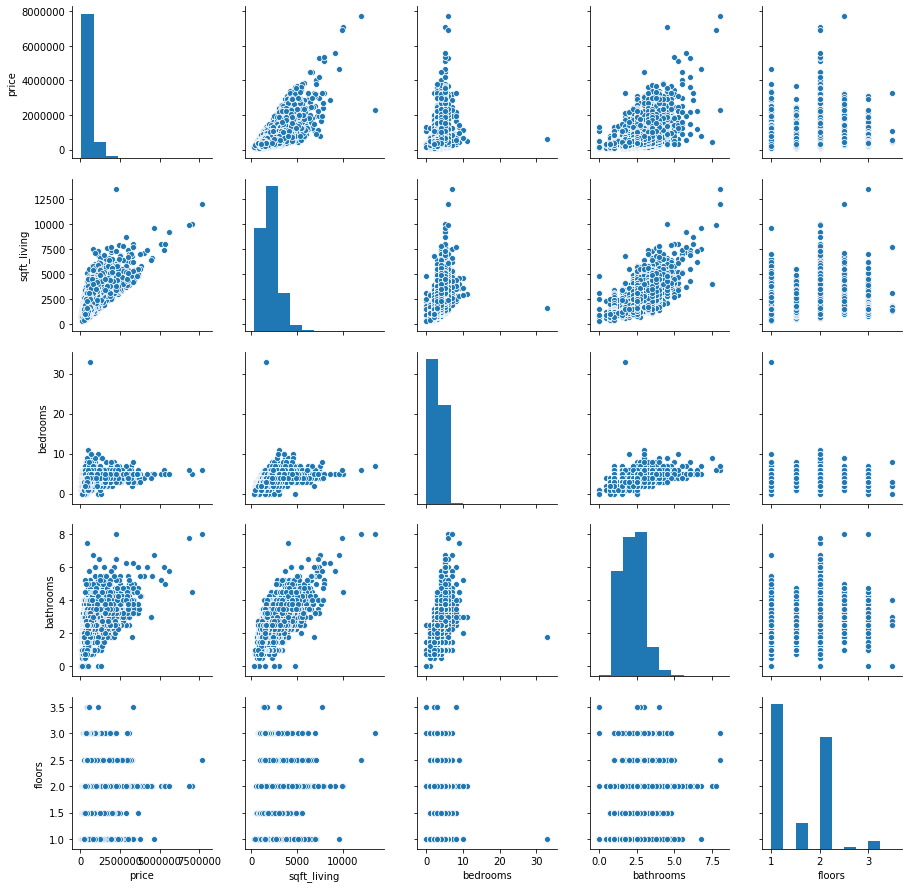

In [6]:
sns.pairplot(data)

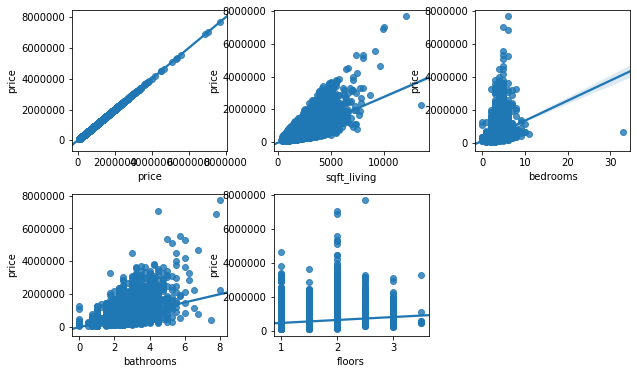

In [7]:
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
i=1
for columns in data:
    ax = fig.add_subplot(2, 3, i)
    sns.regplot(data[columns],data["price"])
    i+=1
#plt.show()


Inference from Regplot and Pairplot

The Dependent variable "price" :

It has Strong Relation with area of living in square feet
It has moderate Relation with number of bathrooms and bedrooms
It has almost no Relation with number of floors.



Finding Outliers using Boxplot

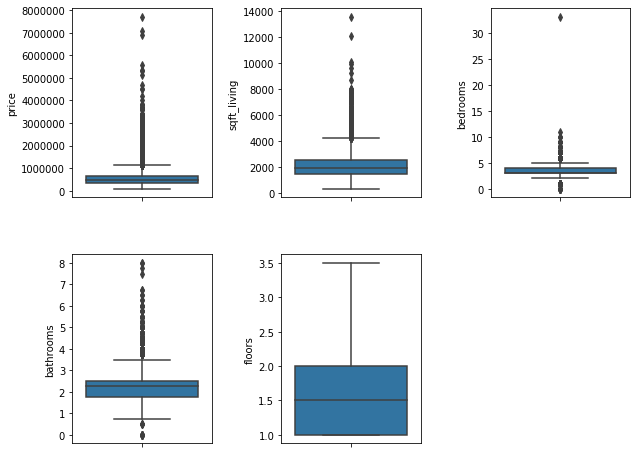

In [9]:
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(hspace=0.3, wspace=0.5)
i=1
for columns in data:
    ax = fig.add_subplot(2, 3, i)
    sns.boxplot(data[columns],orient="v")
    i+=1
#plt.show()


Inference from Boxplot

The Dependent Variable (Price) has many Outliers
Square feet Living has many Outliers
Bedrooms has Moderate Outliers but It also include an Extreme Outlier(which can be removed from dataset)
Bathroms has Moderate Outliers
Floors has No Outlier



## Corelation Matrix

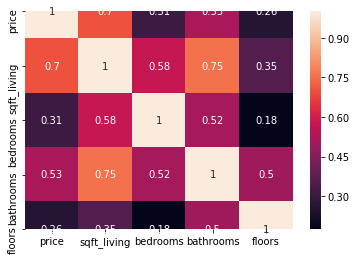

In [10]:
# Heat Map for correlation

sns.heatmap(data.corr(), annot=True);


Inference from Correlation Matrix:

The Target variable 'price' has :

Strong correlation with area of living in square feet
Moderate correlation with number of bathrooms and bedrooms
almost No correlation with number of floors.




## Applying Linear Regression

Target(output) Variable is Price which is a Continous Variable<br/>
Model 1 : Price Vs sqft_living (area of living in square feet)<br/>

Price V/S area of living in square feet (sqft_living)<br/>
where Price is Dependent Variable and sqft_living is Independent Variable



In [11]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [12]:
x=data.iloc[:,1:2]
x.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [14]:
y=data.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


###  Spliting Dataset into Training and Test Set

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### Fitting Linear Model :

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Framing Equation

In [17]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [-41947.45007397]
Coefficient is:  [[279.51011494]]


### Predicting Values 

In [18]:
ypred = lin_reg.predict(x_test)
print("Predicted values:\n")
print(ypred)

Predicted values:

[[ 536638.48784377]
 [ 768631.88324074]
 [1011805.68323515]
 ...
 [ 279489.18210255]
 [ 556204.1958893 ]
 [ 659622.93841566]]


### Calculating R-square value

In [19]:
print("r square value is: ", r2_score(y_test, ypred))

r square value is:  0.48388318901296545


### Calculating p value

In [20]:
stats, p = pearsonr(data.price, data.sqft_living)
print('The p value is {} and p value is {}'.format(stats,p))

The p value is 0.7020350524336835 and p value is 0.0


#### Interference:

R-square value is 0.48 that means only about 48% of the variance in the target variable.
p value is 0.0 < 0.05 i.e. sqft_living is affect the Price of House.



# Model 2: Bedrooms Vs Price

In [22]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [23]:
x=data.iloc[:,2:3]
y=data.iloc[:,0:1]

In [24]:
x.head()

,bedrooms
0,3
1,3
2,2
3,4
4,3


In [26]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


### Spliting Dataset into Training and Test Set

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### Fitting Linear Model

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Framing Equation

In [29]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [139053.13822254]
Coefficient is:  [[118425.4366424]]


### Predicting Values

In [30]:
ypred = lin_reg.predict(x_test)
print("Predicted values:\n")
print(ypred)

Predicted values:

[[612754.88479215]
 [731180.32143456]
 [612754.88479215]
 ...
 [494329.44814975]
 [494329.44814975]
 [612754.88479215]]


### Calculating R-square value

In [31]:
print("r square value is: ", r2_score(y_test, ypred))

r square value is:  0.09758625707518032


### Calculating p value

In [32]:
stats, p = pearsonr(data.price, data.sqft_living)
print('The r value is {} and p value is {}'.format(stats,p))

The r value is 0.7020350524336835 and p value is 0.0


#### Interference:

#### R-square value is 0.09 that means only about 9% of the variance in the target variable.
#### p value is 0.0 < 0.05 i.e. bedrooms is affect the Price of House.

# Model 3: Bathrooms Vs Price

In [33]:
data=data
IDV="bathrooms"
DV="price"
print("{0} Vs {1} ".format(DV,IDV))
print("where {0} is Dependent Variable and {1} is Independent Variable.".format(DV,IDV))

price Vs bathrooms 
where price is Dependent Variable and bathrooms is Independent Variable.


In [34]:
data.loc[:,[IDV,DV]].head()

,bathrooms,price
0,1.00,221900
1,2.25,538000
2,1.00,180000
3,3.00,604000
4,2.00,510000


### Spliting Dataset into Training and Test Set

In [35]:
x=pd.DataFrame(data[IDV])
y=pd.DataFrame(data[DV])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### Fitting Linear Model & Framing Equation :-

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
Intercept=round(lin_reg.intercept_[0],2)
Coefficient=round(lin_reg.coef_[0][0],2)

print("Intercept is: ", Intercept)
print("Coefficient is: ", Coefficient)

Intercept is:  12213.09
Coefficient is:  248800.83


### Predicting Values

In [37]:
ypred = lin_reg.predict(x_test)
print("Predicted values:\n")
print(ypred)

Predicted values:

[[572014.94397682]
 [758615.5630745 ]
 [634215.15034271]
 ...
 [261013.91214735]
 [385414.32487913]
 [572014.94397682]]


### Calculating R-square value

In [38]:
print("r square value is: ", r2_score(y_test, ypred))

r square value is:  0.2706900123214955


### Calculating p value

In [39]:
stats, p = pearsonr(data.price, data.sqft_living)
print('The p value is {} and p value is {}'.format(stats,p))

The p value is 0.7020350524336835 and p value is 0.0


#####  Interference:

R-square value is 0.27 that means only about 27% of the variance in the target variable.
p value is 0.0 < 0.05 i.e. Price of House is affect by Number of Bathrooms.

